In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
mexico = gpd.read_file("ShapeFiles/Mexico/mexico.shp", encoding = "ISO-8859-1").sort_values(by="cve_ent")[['cve_ent','nom_ent','geometry']]
mexico['cve_ent'] = mexico['cve_ent'].astype(int)

In [3]:
municipios = gpd.read_file("ShapeFiles/Municipios/municipios.shp", encoding = "ISO-8859-1").sort_values(by="cve_ent")[['cve_ent','cve_mun','nom_mun','geometry']]
municipios['cve_mun'] = municipios['cve_mun'].astype(int)
cdmx = municipios.loc[municipios['cve_ent']=="09"].drop(['cve_ent'],axis = 1).sort_values(by = "cve_mun")

In [6]:
defunciones = pd.read_excel("Graficos.xlsx",sheet_name="1.3 Defunciones por Estado")
dias = defunciones.filter(like = "2020").columns.tolist() + defunciones.filter(like = "2021").columns.tolist()
defunciones = pd.DataFrame(pd.concat((defunciones[['cve_ent', 'nombre']],defunciones[dias].sum(axis = 1)/defunciones['poblacion']*100000),axis=1)).rename(columns={'nombre':'estado', 0:'defunciones'}).sort_values(by="cve_ent")
gdf_def = gpd.GeoDataFrame(defunciones.merge(mexico,how='left',on ='cve_ent'))


In [9]:
casos = pd.read_excel("Graficos.xlsx",sheet_name="1.4 Casos por Estado")
dias = casos.filter(like = "2020").columns.tolist() + casos.filter(like = "2021").columns.tolist()
casos = pd.DataFrame(pd.concat((casos[['cve_ent','nombre']],casos[dias].sum(axis = 1)/casos['poblacion']*100000),axis=1)).rename(columns={'nombre':'estado', 0:'casos'}).sort_values(by="cve_ent")
gdf_casos = gpd.GeoDataFrame(casos.merge(mexico,how='left',on ='cve_ent'))

In [13]:
desigualdad = pd.read_excel("Graficos.xlsx",sheet_name="1.14-1.16 Desigualdad Nacional").drop(['Unnamed: 6','Unnamed: 7','Unnamed: 8'],axis=1).head(32)
gdf_desigualdad = gpd.GeoDataFrame(desigualdad.merge(mexico,how='left',on ='cve_ent'))

In [15]:
desigualdad_cdmx = pd.read_excel("Graficos.xlsx",sheet_name="1.17-1.18 Desigualdad CDMX")
gdf_desigualdad_cdmx = gpd.GeoDataFrame(desigualdad_cdmx.merge(cdmx,how='left',on ='cve_mun'))


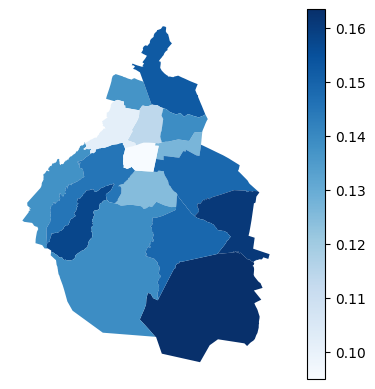

In [17]:
gdf_desigualdad_cdmx.plot(column = "RI 2015",cmap = "Blues",legend= True)
plt.axis('off')
plt.savefig('Mapas/RI2015_CDMX.png')

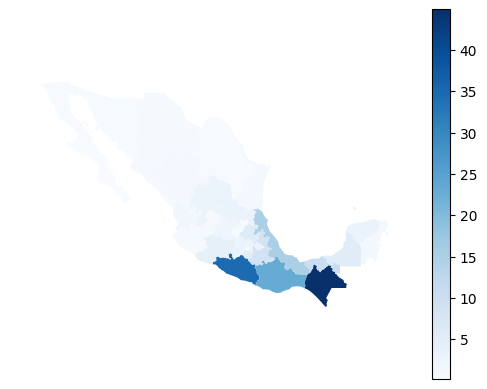

In [18]:
gdf_desigualdad.plot(column = "RI 2018",cmap = "Blues",legend= True)
plt.axis('off')
plt.savefig('Mapas/RI2018.png')

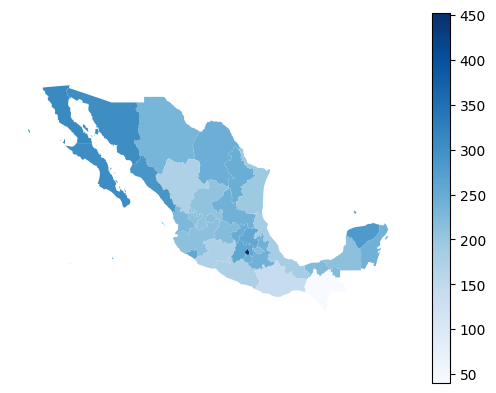

In [19]:
gdf_def.plot(column = "defunciones",cmap = "Blues",legend= True)
plt.axis('off')
plt.savefig('Mapas/defunciones.png')

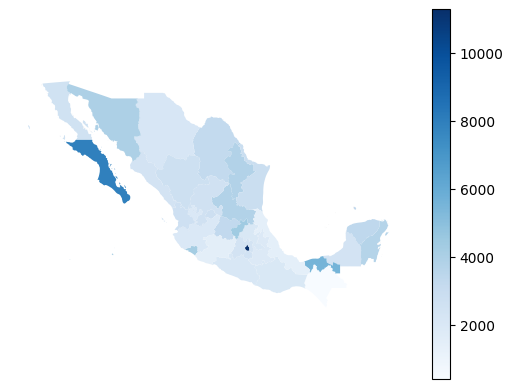

In [20]:
gdf_casos.plot(column = "casos",cmap = "Blues",legend= True)
plt.axis('off')
plt.savefig('Mapas/casos.png')